In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from CoefDF import CoefDF 

def Laplacien_2D(cas):

    plt.close("all")
    
    def fct_u(x, y):
        return np.cos(x**2 + y**2)
    
    def fct_u_Lap(x, y):
        return -4*((x**2 + y**2) * np.cos(x**2 + y**2) + np.sin(x**2 + y**2))
    
    if cas == 1:
        x0, y0 = 1, 1
        odd = 4
        nb = 5
    else:
        x0, y0 = 0, 0
        odd = 6
        nb = 3

    h = np.array([5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3])
    nn = len(h)
    err1 = np.zeros(nn)
    ordre1 = np.zeros(nn - 1)
    err2 = np.zeros(nn)
    ordre2 = np.zeros(nn - 1)

    k = 2
    coef1 = CoefDF(k, 0, np.array([-1, 0, 1]))
    nk1 = (len(coef1) + 1) / 2

    coef2 = CoefDF(k, 0, np.array([-2, -1, 0, 1, 2]))
    nk2 = (len(coef2) + 1) / 2

    L = fct_u_Lap(x0, y0)

    for i in range(nn):
        Lh1 = 0
        for j in range(1,len(coef1)+1):
            Lh1 += coef1[j-1] * (fct_u(x0 + (j - nk1) * h[i], y0) + fct_u(x0, y0 + (j - nk1) * h[i]))
        Lh1 /= h[i] ** k

        Lh2 = 0
        for j in range(1,len(coef2)+1):
            Lh2 += coef2[j-1] * (fct_u(x0 + (j - nk2) * h[i], y0) + fct_u(x0, y0 + (j - nk2) * h[i]))
        Lh2 /= h[i] ** k

        err1[i] = Lh1[0] - L
        err2[i] = Lh2[0] - L

        if i > 0:
            ordre1[i - 1] = np.log(err1[i - 1] / err1[i]) / np.log(h[i - 1] / h[i])
            ordre2[i - 1] = np.log(err2[i - 1] / err2[i]) / np.log(h[i - 1] / h[i])

    plt.loglog(h, np.array(h)**2, 'k-*', h, np.abs(err1), 'b-d', h, np.array(h)**odd, 'k-*', h, np.abs(err2), 'g-d')
    plt.grid(True)
    plt.xlabel('h')
    plt.ylabel('erreur')
    plt.title('Graph loglog de la précision de la méthode')
    plt.legend(['h^2', 'Lh1', f'h^{odd}', 'Lh2'], loc='best')
    plt.show()


    pente_moyenne_err1 = np.polyfit(np.log(h), np.log(np.abs(err1)), 1)[0]
    pente_moyenne_err2 = np.polyfit(np.log(h[:nb]), np.log(np.abs(err2[:nb])), 1)[0]
    
    print(f"Pente moyenne erreur 1: {pente_moyenne_err1}")
    print(f"Pente moyenne erreur 2: {pente_moyenne_err2}")
    print(f"Ordre 1: {ordre1}")
    print(f"Ordre 2: {ordre2}")

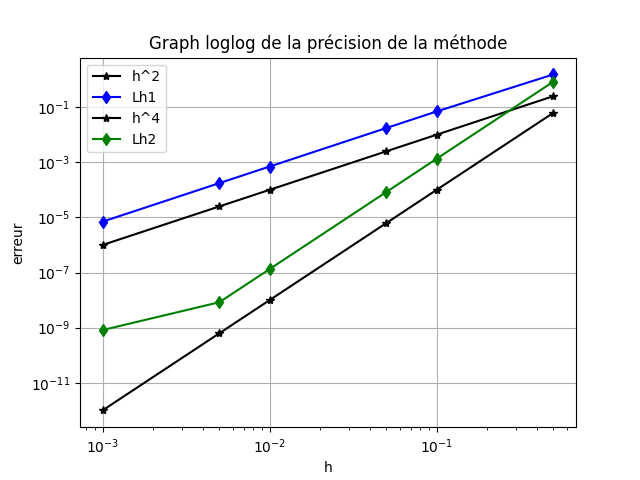

Pente moyenne erreur 1: 1.9835651693609293
Pente moyenne erreur 2: 4.001322478429159
Ordre 1: [1.92216202 1.99481898 1.99928852 1.99994831 1.9999534 ]
Ordre 2: [4.00167691 4.00634127 4.0009212  3.99395376 1.44361158]


In [2]:
Laplacien_2D(1)

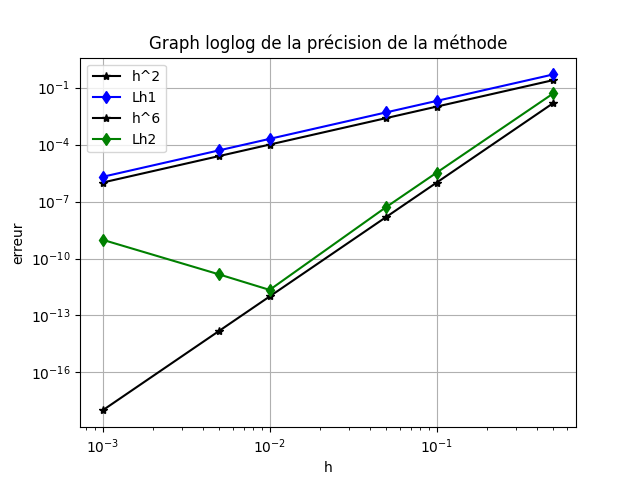

Pente moyenne erreur 1: 1.9993431816220635
Pente moyenne erreur 2: 5.983462502472944
Ordre 1: [1.99676737 1.99998873 1.99999968 1.99999987 1.99994482]
Ordre 2: [ 5.97803469  5.99992032  6.25242558 -2.70043972 -2.61536931]


In [3]:
Laplacien_2D(2)

Pour la deuxième méthode, on observe un phénomène de superconvergence. En effet, à ce point le permier terme de l'erreur de troncature (proportionnel à h^4) s'annule. Le terme suivant est alors en O(h^6)

On peut voir également que pour les méthodes d'ordre très élevé, l'erreur devient si petite qu'elle atteint très vites l'erreur de précision de la machine (ici en double précision ~ $10^{16}$)